In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.io.parsers.read_csv("price.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


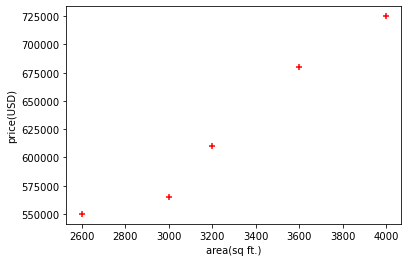

In [3]:
%matplotlib inline 
plt.xlabel("area(sq ft.)")
plt.ylabel('price(USD)')
plt.scatter(df.area,df.price,color ='red',marker='+')

In [4]:
#create linear model object
rg = linear_model.LinearRegression()
# fitting the data means you are training your linear reg model
rg.fit(df[['area']],df.price)

LinearRegression()

In [5]:
rg.predict(np.array([[5000]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [5]:
rg.predict(np.array([[3300]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
#slope of the linear plot
rg.coef_

array([135.78767123])

In [7]:
rg.intercept_

180616.43835616432

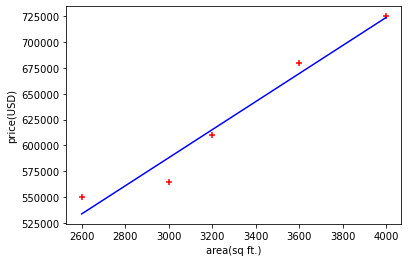

In [8]:
%matplotlib inline 
plt.xlabel("area(sq ft.)")
plt.ylabel('price(USD)')
plt.scatter(df.area,df.price,color ='red',marker='+')
plt.plot(df.area,rg.predict(df[['area']]),color='blue')

In [9]:
prices_ = pd.io.parsers.read_csv("areas.csv")
prices_

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [10]:
p = rg.predict(prices_)

In [11]:
prices_['price'] = p

In [12]:
prices_

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [13]:
prices_.to_csv("prices.csv", index=False)

In [14]:
prices_ = pd.io.parsers.read_csv("prices.csv")
prices_

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [15]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(rg,f)

In [16]:
with open('model_pickle','rb') as f:
    mj = pickle.load(f)

In [17]:
mj.predict([[3300]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])